In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split
RANDOM_STATE = 55
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [232]:
df = pd.read_csv("DataSet/ai_assistant_usage_student_life.csv")

In [233]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [234]:
df.drop('SessionID', axis=1, inplace=True)
df.drop("SessionDate", axis=1, inplace=True)
# df['SessionDate'] = pd.to_datetime(df['SessionDate'])
# df['SessionMonth'] = df['SessionDate'].dt.month
# df['SessionWeekday'] = df['SessionDate'].dt.weekday
# df.drop('SessionDate', axis=1, inplace=True)

In [235]:
df

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,Undergraduate,Computer Science,31.20,11,Studying,2,Assignment Completed,True,1.0
1,Undergraduate,Psychology,13.09,6,Studying,3,Assignment Completed,True,2.0
2,Undergraduate,Business,19.22,5,Coding,3,Assignment Completed,True,3.3
3,Undergraduate,Computer Science,3.70,1,Coding,3,Assignment Completed,True,3.5
4,Undergraduate,Psychology,28.12,9,Writing,3,Assignment Completed,True,2.9
...,...,...,...,...,...,...,...,...,...
9995,Undergraduate,Psychology,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,High School,Business,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,Undergraduate,Biology,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,Undergraduate,Business,30.88,7,Writing,3,Assignment Completed,False,4.3


In [236]:
cat_variables = ['StudentLevel',
                 'Discipline',
                 'TaskType',
                 'FinalOutcome'
]

In [237]:
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

In [238]:
df

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,UsedAgain,SatisfactionRating,StudentLevel_Graduate,StudentLevel_High School,StudentLevel_Undergraduate,Discipline_Biology,Discipline_Business,...,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,FinalOutcome_Assignment Completed,FinalOutcome_Confused,FinalOutcome_Gave Up,FinalOutcome_Idea Drafted
0,31.20,11,2,True,1.0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
1,13.09,6,3,True,2.0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
2,19.22,5,3,True,3.3,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
3,3.70,1,3,True,3.5,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
4,28.12,9,3,True,2.9,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,28.41,5,3,True,4.2,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
9996,13.98,6,5,True,5.0,False,True,False,False,True,...,False,False,False,False,False,True,True,False,False,False
9997,10.78,2,3,True,3.5,False,False,True,True,False,...,False,False,False,False,True,False,False,False,False,True
9998,30.88,7,3,False,4.3,False,False,True,False,True,...,False,False,False,False,False,True,True,False,False,False


In [239]:
features = [x for x in df.columns if not x.startswith('FinalOutcome')]
features

['SessionLengthMin',
 'TotalPrompts',
 'AI_AssistanceLevel',
 'UsedAgain',
 'SatisfactionRating',
 'StudentLevel_Graduate',
 'StudentLevel_High School',
 'StudentLevel_Undergraduate',
 'Discipline_Biology',
 'Discipline_Business',
 'Discipline_Computer Science',
 'Discipline_Engineering',
 'Discipline_History',
 'Discipline_Math',
 'Discipline_Psychology',
 'TaskType_Brainstorming',
 'TaskType_Coding',
 'TaskType_Homework Help',
 'TaskType_Research',
 'TaskType_Studying',
 'TaskType_Writing']

In [240]:
print(len(features))

21


In [241]:
# กรณี target เป็น one-hot
if 'FinalOutcome' not in df.columns:
    df['FinalOutcome'] = df[['FinalOutcome_Assignment Completed', 'FinalOutcome_Confused', 'FinalOutcome_Gave Up', 'FinalOutcome_Idea Drafted']].idxmax(axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['FinalOutcome_label'] = le.fit_transform(df['FinalOutcome'])

print(le.classes_)      # ['Drug_drugA' 'Drug_drugB' 'Drug_drugC' 'Drug_drugX' 'Drug_drugY']


['FinalOutcome_Assignment Completed' 'FinalOutcome_Confused'
 'FinalOutcome_Gave Up' 'FinalOutcome_Idea Drafted']


In [242]:
df["FinalOutcome_label"].unique()

array([0, 3, 1, 2])

In [243]:
# แยก train/test
X_train, X_val, y_train, y_val = train_test_split(
    df[features], 
    df["FinalOutcome_label"],
    train_size=0.8, 
    random_state=RANDOM_STATE
)

In [244]:
y_train

9809    0
1740    3
412     0
9994    1
6966    2
       ..
5488    0
6198    0
8865    2
968     2
4762    0
Name: FinalOutcome_label, Length: 8000, dtype: int64

In [245]:
X_train

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,UsedAgain,SatisfactionRating,StudentLevel_Graduate,StudentLevel_High School,StudentLevel_Undergraduate,Discipline_Biology,Discipline_Business,...,Discipline_Engineering,Discipline_History,Discipline_Math,Discipline_Psychology,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
9809,42.82,12,3,True,2.6,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1740,1.90,1,3,True,2.6,False,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
412,17.95,3,2,True,2.1,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
9994,15.41,4,4,True,3.3,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
6966,22.07,5,1,True,2.0,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,23.75,7,4,False,3.9,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
6198,28.38,7,5,True,4.8,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
8865,19.05,6,3,False,2.9,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
968,12.86,3,2,False,3.1,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [246]:
proportions = pd.Series(y_train).value_counts(normalize=True).sort_index()
print(f'train samples: {len(X_train)} validation samples: {len(X_val)}')
print("Target proportions per class:")
for i, p in proportions.items():
    print(f'  Class {i}: {p:.4f}')

train samples: 8000 validation samples: 2000
Target proportions per class:
  Class 0: 0.4795
  Class 1: 0.1585
  Class 2: 0.0756
  Class 3: 0.2864


In [247]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

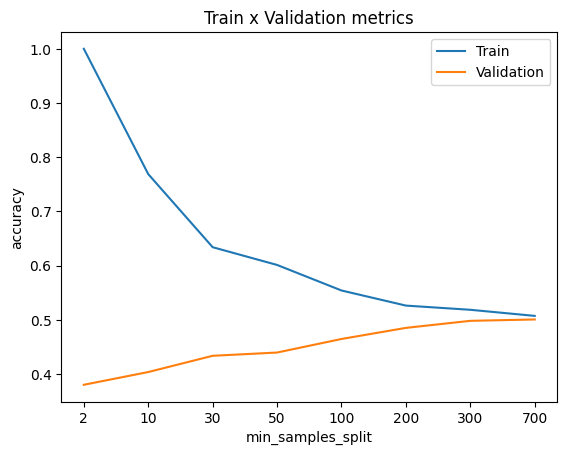

In [248]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

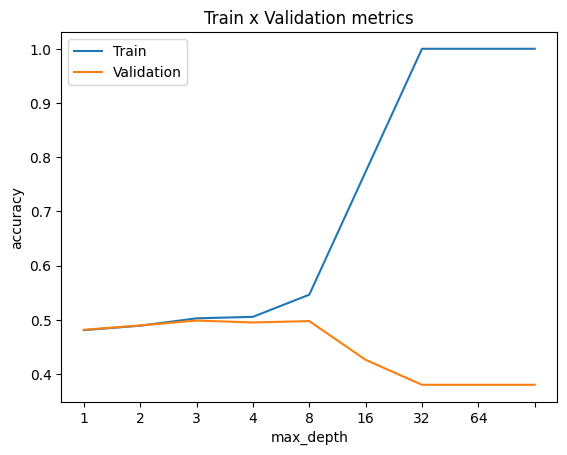

In [249]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [250]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 700,
                                             max_depth = 8,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [251]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.5062
Metrics validation:
	Accuracy score: 0.5005


In [252]:
#Ramdom forest

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

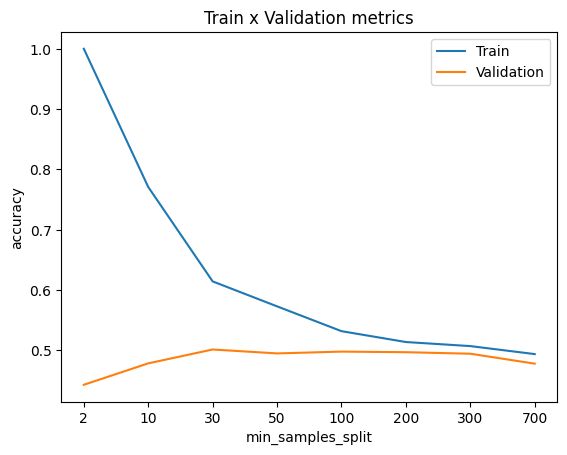

In [253]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

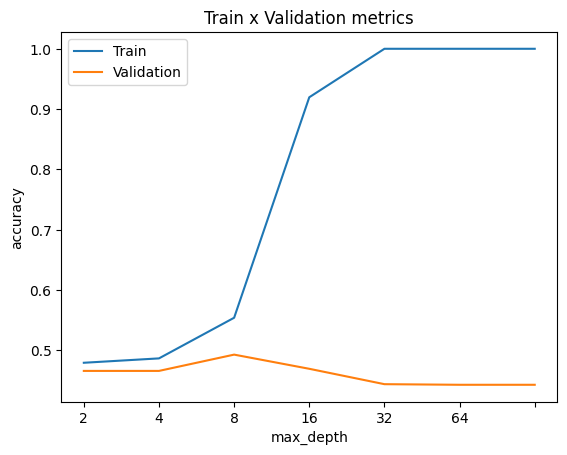

In [254]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

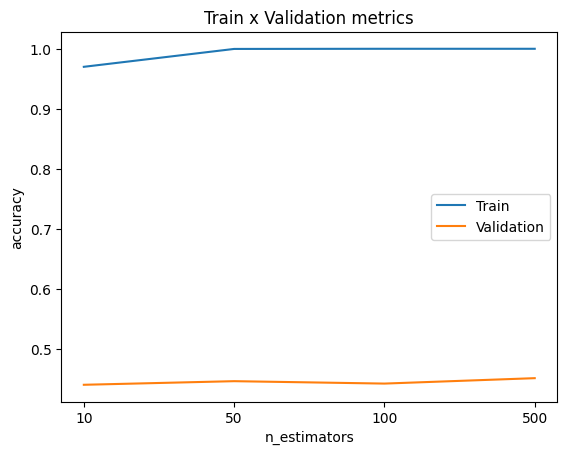

In [255]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [256]:
random_forest_model = RandomForestClassifier(n_estimators = 500,
                                             max_depth = 8, 
                                             min_samples_split = 30).fit(X_train,y_train)

In [257]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.5294
Metrics test:
	Accuracy score: 0.4940


In [258]:
#XGBoost
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [259]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [260]:
y_train

9809    0
1740    3
412     0
9994    1
6966    2
       ..
5488    0
6198    0
8865    2
968     2
4762    0
Name: FinalOutcome_label, Length: 8000, dtype: int64

In [261]:
from xgboost import XGBClassifier

# วิธีใหม่ (แนะนำ)
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.6,
    verbosity=1, 
    random_state=RANDOM_STATE,
    early_stopping_rounds=10  # ย้ายมาไว้ที่นี่
)

xgb_model.fit(
    X_train_fit, 
    y_train_fit, 
    eval_set=[(X_train_eval, y_train_eval)]
)

[0]	validation_0-mlogloss:1.21499
[1]	validation_0-mlogloss:1.15619
[2]	validation_0-mlogloss:1.13317
[3]	validation_0-mlogloss:1.12329
[4]	validation_0-mlogloss:1.12017
[5]	validation_0-mlogloss:1.11941
[6]	validation_0-mlogloss:1.12337
[7]	validation_0-mlogloss:1.12582
[8]	validation_0-mlogloss:1.13131
[9]	validation_0-mlogloss:1.13685
[10]	validation_0-mlogloss:1.14095
[11]	validation_0-mlogloss:1.14467
[12]	validation_0-mlogloss:1.14987
[13]	validation_0-mlogloss:1.15407
[14]	validation_0-mlogloss:1.15688


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,None


In [262]:
xgb_model.best_iteration

5

In [263]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.5701
Metrics test:
	Accuracy score: 0.4850
